In [83]:
import pandas as pd

df = pd.read_csv('datafest2018-Updated-April12.csv')

no_industry_df = df[df.industry.isnull()]
no_cat_df = no_industry_df[no_industry_df.normTitleCategory.isnull()]

print(df.size)
print(no_cat_df.size)

335478805
27505516


In [84]:
# Remove the rows with no cat from the df
cat_df = pd.concat([df, no_cat_df]).drop_duplicates(keep=False)

categories = {x for x in cat_df.normTitleCategory}
print(len(categories))
print(categories)

58
{nan, 'realestate', 'engid', 'veterinary', 'arch', 'manufacturing', 'techinfo', 'medinfo', 'education', 'pharmacy', 'meddental', 'food', 'engcivil', 'techhelp', 'hospitality', 'mining', 'hr', 'agriculture', 'project', 'aviation', 'service', 'finance', 'engelectric', 'childcare', 'arts', 'accounting', 'driver', 'marketing', 'mednurse', 'meddr', 'insurance', 'legal', 'therapy', 'engchem', 'medtech', 'techsoftware', 'protective', 'sales', 'engmech', 'math', 'management', 'install', 'media', 'admin', 'construction', 'care', 'uncategorized', 'personal', 'tech', 'military', 'science', 'warehouse', 'sanitation', 'retail', 'socialscience', 'customer', 'transport', 'sports'}


In [216]:
from datetime import datetime
no_dupe_df = cat_df.drop_duplicates('jobId')
no_dupe_df = no_dupe_df.assign(_date = no_dupe_df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d')))
no_dupe_df = no_dupe_df.assign(month = no_dupe_df._date.apply(lambda x: x.month))
no_dupe_df = no_dupe_df.assign(year = no_dupe_df._date.apply(lambda x: x.year))
no_dupe_df = no_dupe_df.assign(month_year = no_dupe_df._date.apply(lambda x: x.month + 100*x.year))

#finance_no_dupe_df['year'] = finance_no_dupe_df._date.apply(lambda x: x.year)
#finance_no_dupe_df['month_year'] = finance_no_dupe_df._date.apply(lambda x: x.year*100 + x.month)
#finance_df = cat_df[cat_df.normTitleCategory == 'finance']
#finance_no_dupe_df = finance_df.drop_duplicates(subset=['jobId'])

#finance_no_dupe_df['_date'] = finance_no_dupe_df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
#finance_no_dupe_df['month'] = finance_no_dupe_df._date.apply(lambda x: x.month)
#finance_no_dupe_df['year'] = finance_no_dupe_df._date.apply(lambda x: x.year)
#finance_no_dupe_df['month_year'] = finance_no_dupe_df._date.apply(lambda x: x.year*100 + x.month)

In [229]:
us_df = no_dupe_df[no_dupe_df.country == 'US']

us_finance_df = us_df[us_df.normTitleCategory == 'finance']
us_finance_agg = us_finance_df.groupby([us_finance_df.year, us_finance_df.month])

us_salary = us_finance_agg['estimatedSalary'].agg('mean')
us_cnt = finance_agg['date'].count()
us_ratings = finance_agg['avgOverallRating'].agg('mean')

([<matplotlib.axis.XTick at 0x11a4d10f0>,
 <a list of 13 Text xticklabel objects>)

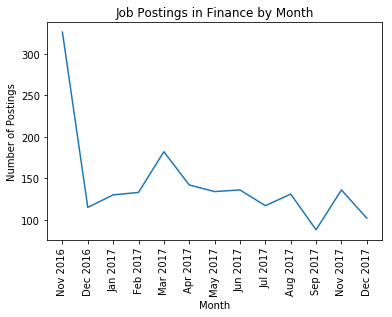

In [222]:
# plotting
import matplotlib.pyplot as plt
plt.plot(range(13), list(us_cnt))
plt.title('Job Postings in Finance by Month')
plt.ylabel('Number of Postings')
plt.xlabel('Month')

month_dict = {
    0: 'Nov 2016',
    1: 'Dec 2016',
    2: 'Jan 2017',
    3: 'Feb 2017',
    4: 'Mar 2017',
    5: 'Apr 2017',
    6: 'May 2017',
    7: 'Jun 2017',
    8: 'Jul 2017',
    9: 'Aug 2017',
    10: 'Sep 2017',
    11: 'Nov 2017',
    12: 'Dec 2017'
}
xtick = [month_dict[x] for x in range(13)]
plt.xticks(range(13), xtick, rotation=90)

#plot(range(13), list(salary))

([<matplotlib.axis.XTick at 0x11a2ad198>,
 <a list of 13 Text xticklabel objects>)

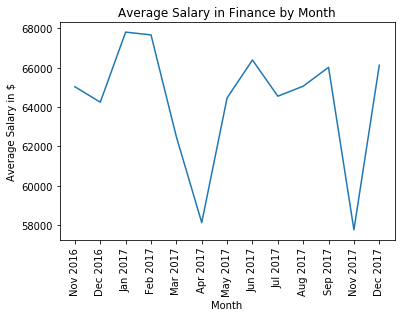

In [223]:
plt.plot(range(13), list(us_salary))
plt.title('Average Salary in Finance by Month')
plt.ylabel('Average Salary in $')
plt.xlabel('Month')
xtick = [month_dict[x] for x in range(13)]
plt.xticks(range(13), xtick, rotation=90)

([<matplotlib.axis.XTick at 0x11a6e7160>,
 <a list of 13 Text xticklabel objects>)

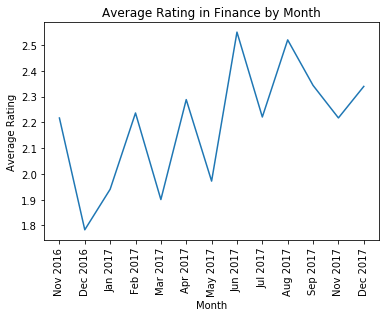

In [231]:
plt.plot(range(13), list(us_ratings))
plt.title('Average Rating in Finance by Month')
plt.ylabel('Average Rating')
plt.xlabel('Month')
xtick = [month_dict[x] for x in range(13)]
plt.xticks(range(13), xtick, rotation=90)